In [1]:
!pip install yfinance scikit-learn matplotlib seaborn ta



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached ta-0.11.0-py3-none-any.whl
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


Random Forest Model Accuracy: 0.50


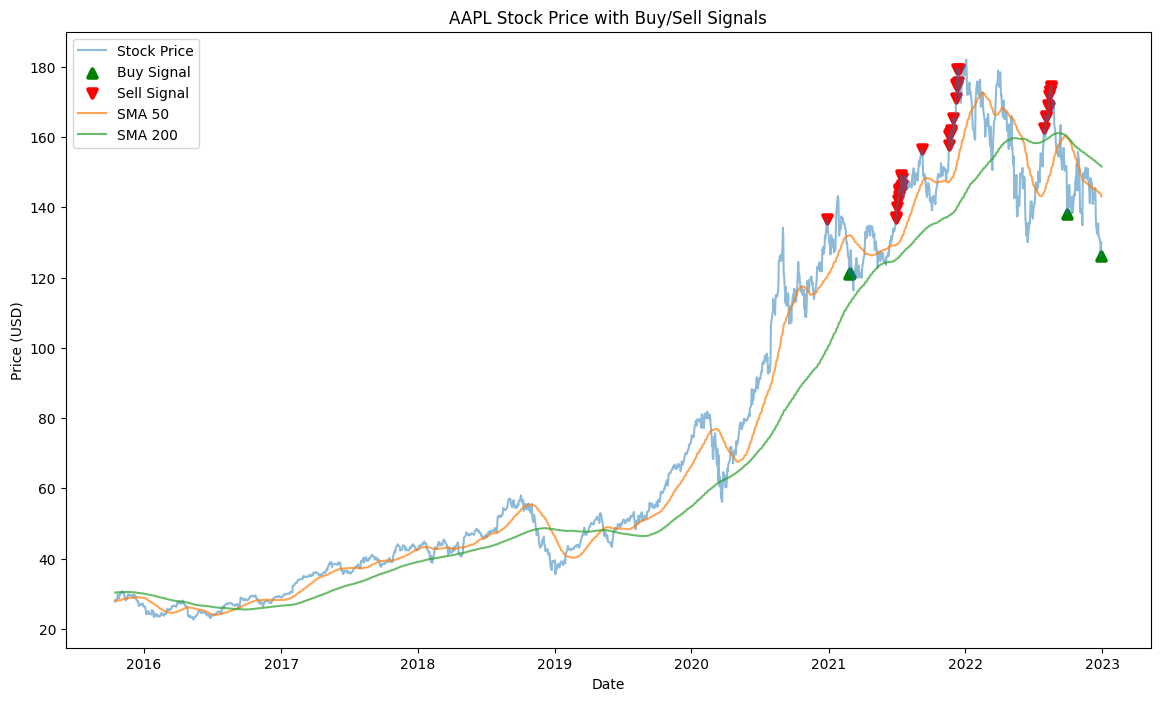

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fetching stock data (for example, Apple stock)
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')

# Feature Engineering - Creating Technical Indicators
# Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# RSI
rsi = RSIIndicator(data['Close'], window=14)
data['RSI'] = rsi.rsi()

# MACD
macd = MACD(data['Close'])
data['MACD'] = macd.macd()
data['MACD_signal'] = macd.macd_signal()

# Bollinger Bands
bb = BollingerBands(data['Close'])
data['BB_upper'] = bb.bollinger_hband()
data['BB_lower'] = bb.bollinger_lband()

# Creating the Target Variable: 1 if price increases in the next period, 0 otherwise
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Dropping missing values
data.dropna(inplace=True)

# Selecting features and target
X = data[['SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_lower']]
y = data['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Machine Learning - Using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on test set
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.2f}')

# Backtesting - Creating Buy/Sell Signals
data['Predicted_Signal'] = np.nan
data.iloc[len(X_train):, -1] = y_pred

# Creating Buy/Sell Signals based on the predicted signal
data['Buy_Signal'] = np.where((data['Predicted_Signal'] == 1) & (data['RSI'] < 30), data['Close'], np.nan)
data['Sell_Signal'] = np.where((data['Predicted_Signal'] == 0) & (data['RSI'] > 70), data['Close'], np.nan)

# Plotting
plt.figure(figsize=(14,8))

# Plot stock price
plt.plot(data.index, data['Close'], label='Stock Price', alpha=0.5)

# Plot Buy and Sell Signals
plt.scatter(data.index, data['Buy_Signal'], label='Buy Signal', marker='^', color='green', lw=3)
plt.scatter(data.index, data['Sell_Signal'], label='Sell Signal', marker='v', color='red', lw=3)

# Plotting Moving Averages
plt.plot(data.index, data['SMA_50'], label='SMA 50', alpha=0.7)
plt.plot(data.index, data['SMA_200'], label='SMA 200', alpha=0.7)

plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [3]:
import yfinance as yf
import pandas as pd

# Example: Fetch a list of S&P 500 tickers
def fetch_sp500_tickers():
    sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    table = pd.read_html(sp500_url)
    tickers = table[0]['Symbol'].tolist()
    return tickers[:500]  # Limit to 500 tickers for this example

# Fetch historical data for multiple stocks
def fetch_data_for_multiple_stocks(tickers, start='2015-01-01', end='2023-01-01'):
    stock_data = {}
    for ticker in tickers:
        print(f"Fetching data for {ticker}")
        stock_data[ticker] = yf.download(ticker, start=start, end=end)
    return stock_data

# Fetch the tickers and data
tickers = fetch_sp500_tickers()  # Fetch the first 500 tickers
stock_data = fetch_data_for_multiple_stocks(tickers)


Fetching data for MMM


[*********************100%%**********************]  1 of 1 completed


Fetching data for AOS


[*********************100%%**********************]  1 of 1 completed


Fetching data for ABT


[*********************100%%**********************]  1 of 1 completed


Fetching data for ABBV


[*********************100%%**********************]  1 of 1 completed


Fetching data for ACN


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADBE


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMD


[*********************100%%**********************]  1 of 1 completed


Fetching data for AES


[*********************100%%**********************]  1 of 1 completed


Fetching data for AFL


[*********************100%%**********************]  1 of 1 completed


Fetching data for A


[*********************100%%**********************]  1 of 1 completed


Fetching data for APD


[*********************100%%**********************]  1 of 1 completed


Fetching data for ABNB


[*********************100%%**********************]  1 of 1 completed


Fetching data for AKAM


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALB


[*********************100%%**********************]  1 of 1 completed


Fetching data for ARE


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALGN


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALLE


[*********************100%%**********************]  1 of 1 completed


Fetching data for LNT


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALL


[*********************100%%**********************]  1 of 1 completed


Fetching data for GOOGL


[*********************100%%**********************]  1 of 1 completed


Fetching data for GOOG


[*********************100%%**********************]  1 of 1 completed


Fetching data for MO


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMZN


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMCR


[*********************100%%**********************]  1 of 1 completed


Fetching data for AEE


[*********************100%%**********************]  1 of 1 completed


Fetching data for AAL


[*********************100%%**********************]  1 of 1 completed


Fetching data for AEP


[*********************100%%**********************]  1 of 1 completed


Fetching data for AXP


[*********************100%%**********************]  1 of 1 completed


Fetching data for AIG


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMT


[*********************100%%**********************]  1 of 1 completed


Fetching data for AWK


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMP


[*********************100%%**********************]  1 of 1 completed


Fetching data for AME


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMGN


[*********************100%%**********************]  1 of 1 completed


Fetching data for APH


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADI


[*********************100%%**********************]  1 of 1 completed


Fetching data for ANSS


[*********************100%%**********************]  1 of 1 completed


Fetching data for AON


[*********************100%%**********************]  1 of 1 completed


Fetching data for APA


[*********************100%%**********************]  1 of 1 completed


Fetching data for AAPL


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMAT


[*********************100%%**********************]  1 of 1 completed


Fetching data for APTV


[*********************100%%**********************]  1 of 1 completed


Fetching data for ACGL


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADM


[*********************100%%**********************]  1 of 1 completed


Fetching data for ANET


[*********************100%%**********************]  1 of 1 completed


Fetching data for AJG


[*********************100%%**********************]  1 of 1 completed


Fetching data for AIZ


[*********************100%%**********************]  1 of 1 completed


Fetching data for T


[*********************100%%**********************]  1 of 1 completed


Fetching data for ATO


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADSK


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADP


[*********************100%%**********************]  1 of 1 completed


Fetching data for AZO


[*********************100%%**********************]  1 of 1 completed


Fetching data for AVB


[*********************100%%**********************]  1 of 1 completed


Fetching data for AVY


[*********************100%%**********************]  1 of 1 completed


Fetching data for AXON


[*********************100%%**********************]  1 of 1 completed


Fetching data for BKR


[*********************100%%**********************]  1 of 1 completed


Fetching data for BALL


[*********************100%%**********************]  1 of 1 completed


Fetching data for BAC


[*********************100%%**********************]  1 of 1 completed


Fetching data for BK


[*********************100%%**********************]  1 of 1 completed


Fetching data for BBWI


[*********************100%%**********************]  1 of 1 completed


Fetching data for BAX


[*********************100%%**********************]  1 of 1 completed


Fetching data for BDX


[*********************100%%**********************]  1 of 1 completed


Fetching data for BRK.B


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Fetching data for BBY


[*********************100%%**********************]  1 of 1 completed


Fetching data for BIO


[*********************100%%**********************]  1 of 1 completed


Fetching data for TECH


[*********************100%%**********************]  1 of 1 completed


Fetching data for BIIB


[*********************100%%**********************]  1 of 1 completed


Fetching data for BLK


[*********************100%%**********************]  1 of 1 completed


Fetching data for BX


[*********************100%%**********************]  1 of 1 completed


Fetching data for BA


[*********************100%%**********************]  1 of 1 completed


Fetching data for BKNG


[*********************100%%**********************]  1 of 1 completed


Fetching data for BWA


[*********************100%%**********************]  1 of 1 completed


Fetching data for BSX


[*********************100%%**********************]  1 of 1 completed


Fetching data for BMY


[*********************100%%**********************]  1 of 1 completed


Fetching data for AVGO


[*********************100%%**********************]  1 of 1 completed


Fetching data for BR


[*********************100%%**********************]  1 of 1 completed


Fetching data for BRO


[*********************100%%**********************]  1 of 1 completed


Fetching data for BF.B


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-01-01)')


Fetching data for BLDR


[*********************100%%**********************]  1 of 1 completed


Fetching data for BG


[*********************100%%**********************]  1 of 1 completed


Fetching data for BXP


[*********************100%%**********************]  1 of 1 completed


Fetching data for CHRW


[*********************100%%**********************]  1 of 1 completed


Fetching data for CDNS


[*********************100%%**********************]  1 of 1 completed


Fetching data for CZR


[*********************100%%**********************]  1 of 1 completed


Fetching data for CPT


[*********************100%%**********************]  1 of 1 completed


Fetching data for CPB


[*********************100%%**********************]  1 of 1 completed


Fetching data for COF


[*********************100%%**********************]  1 of 1 completed


Fetching data for CAH


[*********************100%%**********************]  1 of 1 completed


Fetching data for KMX


[*********************100%%**********************]  1 of 1 completed


Fetching data for CCL


[*********************100%%**********************]  1 of 1 completed


Fetching data for CARR


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTLT


[*********************100%%**********************]  1 of 1 completed


Fetching data for CAT


[*********************100%%**********************]  1 of 1 completed


Fetching data for CBOE


[*********************100%%**********************]  1 of 1 completed


Fetching data for CBRE


[*********************100%%**********************]  1 of 1 completed


Fetching data for CDW


[*********************100%%**********************]  1 of 1 completed


Fetching data for CE


[*********************100%%**********************]  1 of 1 completed


Fetching data for COR


[*********************100%%**********************]  1 of 1 completed


Fetching data for CNC


[*********************100%%**********************]  1 of 1 completed


Fetching data for CNP


[*********************100%%**********************]  1 of 1 completed


Fetching data for CF


[*********************100%%**********************]  1 of 1 completed


Fetching data for CRL


[*********************100%%**********************]  1 of 1 completed


Fetching data for SCHW


[*********************100%%**********************]  1 of 1 completed


Fetching data for CHTR


[*********************100%%**********************]  1 of 1 completed


Fetching data for CVX


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMG


[*********************100%%**********************]  1 of 1 completed


Fetching data for CB


[*********************100%%**********************]  1 of 1 completed


Fetching data for CHD


[*********************100%%**********************]  1 of 1 completed


Fetching data for CI


[*********************100%%**********************]  1 of 1 completed


Fetching data for CINF


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTAS


[*********************100%%**********************]  1 of 1 completed


Fetching data for CSCO


[*********************100%%**********************]  1 of 1 completed


Fetching data for C


[*********************100%%**********************]  1 of 1 completed


Fetching data for CFG


[*********************100%%**********************]  1 of 1 completed


Fetching data for CLX


[*********************100%%**********************]  1 of 1 completed


Fetching data for CME


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMS


[*********************100%%**********************]  1 of 1 completed


Fetching data for KO


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTSH


[*********************100%%**********************]  1 of 1 completed


Fetching data for CL


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMCSA


[*********************100%%**********************]  1 of 1 completed


Fetching data for CAG


[*********************100%%**********************]  1 of 1 completed


Fetching data for COP


[*********************100%%**********************]  1 of 1 completed


Fetching data for ED


[*********************100%%**********************]  1 of 1 completed


Fetching data for STZ


[*********************100%%**********************]  1 of 1 completed


Fetching data for CEG


[*********************100%%**********************]  1 of 1 completed


Fetching data for COO


[*********************100%%**********************]  1 of 1 completed


Fetching data for CPRT


[*********************100%%**********************]  1 of 1 completed


Fetching data for GLW


[*********************100%%**********************]  1 of 1 completed


Fetching data for CPAY


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTVA


[*********************100%%**********************]  1 of 1 completed


Fetching data for CSGP


[*********************100%%**********************]  1 of 1 completed


Fetching data for COST


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTRA


[*********************100%%**********************]  1 of 1 completed


Fetching data for CRWD


[*********************100%%**********************]  1 of 1 completed


Fetching data for CCI


[*********************100%%**********************]  1 of 1 completed


Fetching data for CSX


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMI


[*********************100%%**********************]  1 of 1 completed


Fetching data for CVS


[*********************100%%**********************]  1 of 1 completed


Fetching data for DHR


[*********************100%%**********************]  1 of 1 completed


Fetching data for DRI


[*********************100%%**********************]  1 of 1 completed


Fetching data for DVA


[*********************100%%**********************]  1 of 1 completed


Fetching data for DAY


[*********************100%%**********************]  1 of 1 completed


Fetching data for DECK


[*********************100%%**********************]  1 of 1 completed


Fetching data for DE


[*********************100%%**********************]  1 of 1 completed


Fetching data for DAL


[*********************100%%**********************]  1 of 1 completed


Fetching data for DVN


[*********************100%%**********************]  1 of 1 completed


Fetching data for DXCM


[*********************100%%**********************]  1 of 1 completed


Fetching data for FANG


[*********************100%%**********************]  1 of 1 completed


Fetching data for DLR


[*********************100%%**********************]  1 of 1 completed


Fetching data for DFS


[*********************100%%**********************]  1 of 1 completed


Fetching data for DG


[*********************100%%**********************]  1 of 1 completed


Fetching data for DLTR


[*********************100%%**********************]  1 of 1 completed


Fetching data for D


[*********************100%%**********************]  1 of 1 completed


Fetching data for DPZ


[*********************100%%**********************]  1 of 1 completed


Fetching data for DOV


[*********************100%%**********************]  1 of 1 completed


Fetching data for DOW


[*********************100%%**********************]  1 of 1 completed


Fetching data for DHI


[*********************100%%**********************]  1 of 1 completed


Fetching data for DTE


[*********************100%%**********************]  1 of 1 completed


Fetching data for DUK


[*********************100%%**********************]  1 of 1 completed


Fetching data for DD


[*********************100%%**********************]  1 of 1 completed


Fetching data for EMN


[*********************100%%**********************]  1 of 1 completed


Fetching data for ETN


[*********************100%%**********************]  1 of 1 completed


Fetching data for EBAY


[*********************100%%**********************]  1 of 1 completed


Fetching data for ECL


[*********************100%%**********************]  1 of 1 completed


Fetching data for EIX


[*********************100%%**********************]  1 of 1 completed


Fetching data for EW


[*********************100%%**********************]  1 of 1 completed


Fetching data for EA


[*********************100%%**********************]  1 of 1 completed


Fetching data for ELV


[*********************100%%**********************]  1 of 1 completed


Fetching data for EMR


[*********************100%%**********************]  1 of 1 completed


Fetching data for ENPH


[*********************100%%**********************]  1 of 1 completed


Fetching data for ETR


[*********************100%%**********************]  1 of 1 completed


Fetching data for EOG


[*********************100%%**********************]  1 of 1 completed


Fetching data for EPAM


[*********************100%%**********************]  1 of 1 completed


Fetching data for EQT


[*********************100%%**********************]  1 of 1 completed


Fetching data for EFX


[*********************100%%**********************]  1 of 1 completed


Fetching data for EQIX


[*********************100%%**********************]  1 of 1 completed


Fetching data for EQR


[*********************100%%**********************]  1 of 1 completed


Fetching data for ESS


[*********************100%%**********************]  1 of 1 completed


Fetching data for EL


[*********************100%%**********************]  1 of 1 completed


Fetching data for ETSY


[*********************100%%**********************]  1 of 1 completed


Fetching data for EG


[*********************100%%**********************]  1 of 1 completed


Fetching data for EVRG


[*********************100%%**********************]  1 of 1 completed


Fetching data for ES


[*********************100%%**********************]  1 of 1 completed


Fetching data for EXC


[*********************100%%**********************]  1 of 1 completed


Fetching data for EXPE


[*********************100%%**********************]  1 of 1 completed


Fetching data for EXPD


[*********************100%%**********************]  1 of 1 completed


Fetching data for EXR


[*********************100%%**********************]  1 of 1 completed


Fetching data for XOM


[*********************100%%**********************]  1 of 1 completed


Fetching data for FFIV


[*********************100%%**********************]  1 of 1 completed


Fetching data for FDS


[*********************100%%**********************]  1 of 1 completed


Fetching data for FICO


[*********************100%%**********************]  1 of 1 completed


Fetching data for FAST


[*********************100%%**********************]  1 of 1 completed


Fetching data for FRT


[*********************100%%**********************]  1 of 1 completed


Fetching data for FDX


[*********************100%%**********************]  1 of 1 completed


Fetching data for FIS


[*********************100%%**********************]  1 of 1 completed


Fetching data for FITB


[*********************100%%**********************]  1 of 1 completed


Fetching data for FSLR


[*********************100%%**********************]  1 of 1 completed


Fetching data for FE


[*********************100%%**********************]  1 of 1 completed


Fetching data for FI


[*********************100%%**********************]  1 of 1 completed


Fetching data for FMC


[*********************100%%**********************]  1 of 1 completed


Fetching data for F


[*********************100%%**********************]  1 of 1 completed


Fetching data for FTNT


[*********************100%%**********************]  1 of 1 completed


Fetching data for FTV


[*********************100%%**********************]  1 of 1 completed


Fetching data for FOXA


[*********************100%%**********************]  1 of 1 completed


Fetching data for FOX


[*********************100%%**********************]  1 of 1 completed


Fetching data for BEN


[*********************100%%**********************]  1 of 1 completed


Fetching data for FCX


[*********************100%%**********************]  1 of 1 completed


Fetching data for GRMN


[*********************100%%**********************]  1 of 1 completed


Fetching data for IT


[*********************100%%**********************]  1 of 1 completed


Fetching data for GE


[*********************100%%**********************]  1 of 1 completed


Fetching data for GEHC


[*********************100%%**********************]  1 of 1 completed


Fetching data for GEV


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GEV']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1672549200")


Fetching data for GEN


[*********************100%%**********************]  1 of 1 completed


Fetching data for GNRC


[*********************100%%**********************]  1 of 1 completed


Fetching data for GD


[*********************100%%**********************]  1 of 1 completed


Fetching data for GIS


[*********************100%%**********************]  1 of 1 completed


Fetching data for GM


[*********************100%%**********************]  1 of 1 completed


Fetching data for GPC


[*********************100%%**********************]  1 of 1 completed


Fetching data for GILD


[*********************100%%**********************]  1 of 1 completed


Fetching data for GPN


[*********************100%%**********************]  1 of 1 completed


Fetching data for GL


[*********************100%%**********************]  1 of 1 completed


Fetching data for GDDY


[*********************100%%**********************]  1 of 1 completed


Fetching data for GS


[*********************100%%**********************]  1 of 1 completed


Fetching data for HAL


[*********************100%%**********************]  1 of 1 completed


Fetching data for HIG


[*********************100%%**********************]  1 of 1 completed


Fetching data for HAS


[*********************100%%**********************]  1 of 1 completed


Fetching data for HCA


[*********************100%%**********************]  1 of 1 completed


Fetching data for DOC


[*********************100%%**********************]  1 of 1 completed


Fetching data for HSIC


[*********************100%%**********************]  1 of 1 completed


Fetching data for HSY


[*********************100%%**********************]  1 of 1 completed


Fetching data for HES


[*********************100%%**********************]  1 of 1 completed


Fetching data for HPE


[*********************100%%**********************]  1 of 1 completed


Fetching data for HLT


[*********************100%%**********************]  1 of 1 completed


Fetching data for HOLX


[*********************100%%**********************]  1 of 1 completed


Fetching data for HD


[*********************100%%**********************]  1 of 1 completed


Fetching data for HON


[*********************100%%**********************]  1 of 1 completed


Fetching data for HRL


[*********************100%%**********************]  1 of 1 completed


Fetching data for HST


[*********************100%%**********************]  1 of 1 completed


Fetching data for HWM


[*********************100%%**********************]  1 of 1 completed


Fetching data for HPQ


[*********************100%%**********************]  1 of 1 completed


Fetching data for HUBB


[*********************100%%**********************]  1 of 1 completed


Fetching data for HUM


[*********************100%%**********************]  1 of 1 completed


Fetching data for HBAN


[*********************100%%**********************]  1 of 1 completed


Fetching data for HII


[*********************100%%**********************]  1 of 1 completed


Fetching data for IBM


[*********************100%%**********************]  1 of 1 completed


Fetching data for IEX


[*********************100%%**********************]  1 of 1 completed


Fetching data for IDXX


[*********************100%%**********************]  1 of 1 completed


Fetching data for ITW


[*********************100%%**********************]  1 of 1 completed


Fetching data for INCY


[*********************100%%**********************]  1 of 1 completed


Fetching data for IR


[*********************100%%**********************]  1 of 1 completed


Fetching data for PODD


[*********************100%%**********************]  1 of 1 completed


Fetching data for INTC


[*********************100%%**********************]  1 of 1 completed


Fetching data for ICE


[*********************100%%**********************]  1 of 1 completed


Fetching data for IFF


[*********************100%%**********************]  1 of 1 completed


Fetching data for IP


[*********************100%%**********************]  1 of 1 completed


Fetching data for IPG


[*********************100%%**********************]  1 of 1 completed


Fetching data for INTU


[*********************100%%**********************]  1 of 1 completed


Fetching data for ISRG


[*********************100%%**********************]  1 of 1 completed


Fetching data for IVZ


[*********************100%%**********************]  1 of 1 completed


Fetching data for INVH


[*********************100%%**********************]  1 of 1 completed


Fetching data for IQV


[*********************100%%**********************]  1 of 1 completed


Fetching data for IRM


[*********************100%%**********************]  1 of 1 completed


Fetching data for JBHT


[*********************100%%**********************]  1 of 1 completed


Fetching data for JBL


[*********************100%%**********************]  1 of 1 completed


Fetching data for JKHY


[*********************100%%**********************]  1 of 1 completed


Fetching data for J


[*********************100%%**********************]  1 of 1 completed


Fetching data for JNJ


[*********************100%%**********************]  1 of 1 completed


Fetching data for JCI


[*********************100%%**********************]  1 of 1 completed


Fetching data for JPM


[*********************100%%**********************]  1 of 1 completed


Fetching data for JNPR


[*********************100%%**********************]  1 of 1 completed


Fetching data for K


[*********************100%%**********************]  1 of 1 completed


Fetching data for KVUE


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1672549200")


Fetching data for KDP


[*********************100%%**********************]  1 of 1 completed


Fetching data for KEY


[*********************100%%**********************]  1 of 1 completed


Fetching data for KEYS


[*********************100%%**********************]  1 of 1 completed


Fetching data for KMB


[*********************100%%**********************]  1 of 1 completed


Fetching data for KIM


[*********************100%%**********************]  1 of 1 completed


Fetching data for KMI


[*********************100%%**********************]  1 of 1 completed


Fetching data for KKR


[*********************100%%**********************]  1 of 1 completed


Fetching data for KLAC


[*********************100%%**********************]  1 of 1 completed


Fetching data for KHC


[*********************100%%**********************]  1 of 1 completed


Fetching data for KR


[*********************100%%**********************]  1 of 1 completed


Fetching data for LHX


[*********************100%%**********************]  1 of 1 completed


Fetching data for LH


[*********************100%%**********************]  1 of 1 completed


Fetching data for LRCX


[*********************100%%**********************]  1 of 1 completed


Fetching data for LW


[*********************100%%**********************]  1 of 1 completed


Fetching data for LVS


[*********************100%%**********************]  1 of 1 completed


Fetching data for LDOS


[*********************100%%**********************]  1 of 1 completed


Fetching data for LEN


[*********************100%%**********************]  1 of 1 completed


Fetching data for LLY


[*********************100%%**********************]  1 of 1 completed


Fetching data for LIN


[*********************100%%**********************]  1 of 1 completed


Fetching data for LYV


[*********************100%%**********************]  1 of 1 completed


Fetching data for LKQ


[*********************100%%**********************]  1 of 1 completed


Fetching data for LMT


[*********************100%%**********************]  1 of 1 completed


Fetching data for L


[*********************100%%**********************]  1 of 1 completed


Fetching data for LOW


[*********************100%%**********************]  1 of 1 completed


Fetching data for LULU


[*********************100%%**********************]  1 of 1 completed


Fetching data for LYB


[*********************100%%**********************]  1 of 1 completed


Fetching data for MTB


[*********************100%%**********************]  1 of 1 completed


Fetching data for MRO


[*********************100%%**********************]  1 of 1 completed


Fetching data for MPC


[*********************100%%**********************]  1 of 1 completed


Fetching data for MKTX


[*********************100%%**********************]  1 of 1 completed


Fetching data for MAR


[*********************100%%**********************]  1 of 1 completed


Fetching data for MMC


[*********************100%%**********************]  1 of 1 completed


Fetching data for MLM


[*********************100%%**********************]  1 of 1 completed


Fetching data for MAS


[*********************100%%**********************]  1 of 1 completed


Fetching data for MA


[*********************100%%**********************]  1 of 1 completed


Fetching data for MTCH


[*********************100%%**********************]  1 of 1 completed


Fetching data for MKC


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCD


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCK


[*********************100%%**********************]  1 of 1 completed


Fetching data for MDT


[*********************100%%**********************]  1 of 1 completed


Fetching data for MRK


[*********************100%%**********************]  1 of 1 completed


Fetching data for META


[*********************100%%**********************]  1 of 1 completed


Fetching data for MET


[*********************100%%**********************]  1 of 1 completed


Fetching data for MTD


[*********************100%%**********************]  1 of 1 completed


Fetching data for MGM


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCHP


[*********************100%%**********************]  1 of 1 completed


Fetching data for MU


[*********************100%%**********************]  1 of 1 completed


Fetching data for MSFT


[*********************100%%**********************]  1 of 1 completed


Fetching data for MAA


[*********************100%%**********************]  1 of 1 completed


Fetching data for MRNA


[*********************100%%**********************]  1 of 1 completed


Fetching data for MHK


[*********************100%%**********************]  1 of 1 completed


Fetching data for MOH


[*********************100%%**********************]  1 of 1 completed


Fetching data for TAP


[*********************100%%**********************]  1 of 1 completed


Fetching data for MDLZ


[*********************100%%**********************]  1 of 1 completed


Fetching data for MPWR


[*********************100%%**********************]  1 of 1 completed


Fetching data for MNST


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCO


[*********************100%%**********************]  1 of 1 completed


Fetching data for MS


[*********************100%%**********************]  1 of 1 completed


Fetching data for MOS


[*********************100%%**********************]  1 of 1 completed


Fetching data for MSI


[*********************100%%**********************]  1 of 1 completed


Fetching data for MSCI


[*********************100%%**********************]  1 of 1 completed


Fetching data for NDAQ


[*********************100%%**********************]  1 of 1 completed


Fetching data for NTAP


[*********************100%%**********************]  1 of 1 completed


Fetching data for NFLX


[*********************100%%**********************]  1 of 1 completed


Fetching data for NEM


[*********************100%%**********************]  1 of 1 completed


Fetching data for NWSA


[*********************100%%**********************]  1 of 1 completed


Fetching data for NWS


[*********************100%%**********************]  1 of 1 completed


Fetching data for NEE


[*********************100%%**********************]  1 of 1 completed


Fetching data for NKE


[*********************100%%**********************]  1 of 1 completed


Fetching data for NI


[*********************100%%**********************]  1 of 1 completed


Fetching data for NDSN


[*********************100%%**********************]  1 of 1 completed


Fetching data for NSC


[*********************100%%**********************]  1 of 1 completed


Fetching data for NTRS


[*********************100%%**********************]  1 of 1 completed


Fetching data for NOC


[*********************100%%**********************]  1 of 1 completed


Fetching data for NCLH


[*********************100%%**********************]  1 of 1 completed


Fetching data for NRG


[*********************100%%**********************]  1 of 1 completed


Fetching data for NUE


[*********************100%%**********************]  1 of 1 completed


Fetching data for NVDA


[*********************100%%**********************]  1 of 1 completed


Fetching data for NVR


[*********************100%%**********************]  1 of 1 completed


Fetching data for NXPI


[*********************100%%**********************]  1 of 1 completed


Fetching data for ORLY


[*********************100%%**********************]  1 of 1 completed


Fetching data for OXY


[*********************100%%**********************]  1 of 1 completed


Fetching data for ODFL


[*********************100%%**********************]  1 of 1 completed


Fetching data for OMC


[*********************100%%**********************]  1 of 1 completed


Fetching data for ON


[*********************100%%**********************]  1 of 1 completed


Fetching data for OKE


[*********************100%%**********************]  1 of 1 completed


Fetching data for ORCL


[*********************100%%**********************]  1 of 1 completed


Fetching data for OTIS


[*********************100%%**********************]  1 of 1 completed


Fetching data for PCAR


[*********************100%%**********************]  1 of 1 completed


Fetching data for PKG


[*********************100%%**********************]  1 of 1 completed


Fetching data for PANW


[*********************100%%**********************]  1 of 1 completed


Fetching data for PARA


[*********************100%%**********************]  1 of 1 completed


Fetching data for PH


[*********************100%%**********************]  1 of 1 completed


Fetching data for PAYX


[*********************100%%**********************]  1 of 1 completed


Fetching data for PAYC


[*********************100%%**********************]  1 of 1 completed


Fetching data for PYPL


[*********************100%%**********************]  1 of 1 completed


Fetching data for PNR


[*********************100%%**********************]  1 of 1 completed


Fetching data for PEP


[*********************100%%**********************]  1 of 1 completed


Fetching data for PFE


[*********************100%%**********************]  1 of 1 completed


Fetching data for PCG


[*********************100%%**********************]  1 of 1 completed


Fetching data for PM


[*********************100%%**********************]  1 of 1 completed


Fetching data for PSX


[*********************100%%**********************]  1 of 1 completed


Fetching data for PNW


[*********************100%%**********************]  1 of 1 completed


Fetching data for PNC


[*********************100%%**********************]  1 of 1 completed


Fetching data for POOL


[*********************100%%**********************]  1 of 1 completed


Fetching data for PPG


[*********************100%%**********************]  1 of 1 completed


Fetching data for PPL


[*********************100%%**********************]  1 of 1 completed


Fetching data for PFG


[*********************100%%**********************]  1 of 1 completed


Fetching data for PG


[*********************100%%**********************]  1 of 1 completed


Fetching data for PGR


[*********************100%%**********************]  1 of 1 completed


Fetching data for PLD


[*********************100%%**********************]  1 of 1 completed


Fetching data for PRU


[*********************100%%**********************]  1 of 1 completed


Fetching data for PEG


[*********************100%%**********************]  1 of 1 completed


Fetching data for PTC


[*********************100%%**********************]  1 of 1 completed


Fetching data for PSA


[*********************100%%**********************]  1 of 1 completed


Fetching data for PHM


[*********************100%%**********************]  1 of 1 completed


Fetching data for QRVO


[*********************100%%**********************]  1 of 1 completed


Fetching data for PWR


[*********************100%%**********************]  1 of 1 completed


Fetching data for QCOM


[*********************100%%**********************]  1 of 1 completed


Fetching data for DGX


[*********************100%%**********************]  1 of 1 completed


Fetching data for RL


[*********************100%%**********************]  1 of 1 completed


Fetching data for RJF


[*********************100%%**********************]  1 of 1 completed


Fetching data for RTX


[*********************100%%**********************]  1 of 1 completed


Fetching data for O


[*********************100%%**********************]  1 of 1 completed


Fetching data for REG


[*********************100%%**********************]  1 of 1 completed


Fetching data for REGN


[*********************100%%**********************]  1 of 1 completed


Fetching data for RF


[*********************100%%**********************]  1 of 1 completed


Fetching data for RSG


[*********************100%%**********************]  1 of 1 completed


Fetching data for RMD


[*********************100%%**********************]  1 of 1 completed


Fetching data for RVTY


[*********************100%%**********************]  1 of 1 completed


Fetching data for ROK


[*********************100%%**********************]  1 of 1 completed


Fetching data for ROL


[*********************100%%**********************]  1 of 1 completed


Fetching data for ROP


[*********************100%%**********************]  1 of 1 completed


Fetching data for ROST


[*********************100%%**********************]  1 of 1 completed


Fetching data for RCL


[*********************100%%**********************]  1 of 1 completed


Fetching data for SPGI


[*********************100%%**********************]  1 of 1 completed


Fetching data for CRM


[*********************100%%**********************]  1 of 1 completed


Fetching data for SBAC


[*********************100%%**********************]  1 of 1 completed


Fetching data for SLB


[*********************100%%**********************]  1 of 1 completed


Fetching data for STX


[*********************100%%**********************]  1 of 1 completed


Fetching data for SRE


[*********************100%%**********************]  1 of 1 completed


Fetching data for NOW


[*********************100%%**********************]  1 of 1 completed


Fetching data for SHW


[*********************100%%**********************]  1 of 1 completed


Fetching data for SPG


[*********************100%%**********************]  1 of 1 completed


Fetching data for SWKS


[*********************100%%**********************]  1 of 1 completed


Fetching data for SJM


[*********************100%%**********************]  1 of 1 completed


Fetching data for SW


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SW']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1672549200")


Fetching data for SNA


[*********************100%%**********************]  1 of 1 completed


Fetching data for SOLV


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SOLV']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1672549200")


Fetching data for SO


[*********************100%%**********************]  1 of 1 completed


Fetching data for LUV


[*********************100%%**********************]  1 of 1 completed


Fetching data for SWK


[*********************100%%**********************]  1 of 1 completed


Fetching data for SBUX


[*********************100%%**********************]  1 of 1 completed


Fetching data for STT


[*********************100%%**********************]  1 of 1 completed


Fetching data for STLD


[*********************100%%**********************]  1 of 1 completed


Fetching data for STE


[*********************100%%**********************]  1 of 1 completed


Fetching data for SYK


[*********************100%%**********************]  1 of 1 completed


Fetching data for SMCI


[*********************100%%**********************]  1 of 1 completed


Fetching data for SYF


[*********************100%%**********************]  1 of 1 completed


Fetching data for SNPS


[*********************100%%**********************]  1 of 1 completed


Fetching data for SYY


[*********************100%%**********************]  1 of 1 completed


Fetching data for TMUS


[*********************100%%**********************]  1 of 1 completed


Fetching data for TROW


[*********************100%%**********************]  1 of 1 completed


Fetching data for TTWO


[*********************100%%**********************]  1 of 1 completed


Fetching data for TPR


[*********************100%%**********************]  1 of 1 completed


Fetching data for TRGP


[*********************100%%**********************]  1 of 1 completed


Fetching data for TGT


[*********************100%%**********************]  1 of 1 completed


Fetching data for TEL


[*********************100%%**********************]  1 of 1 completed


Fetching data for TDY


[*********************100%%**********************]  1 of 1 completed


Fetching data for TFX


[*********************100%%**********************]  1 of 1 completed


Fetching data for TER


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSLA


[*********************100%%**********************]  1 of 1 completed


Fetching data for TXN


[*********************100%%**********************]  1 of 1 completed


Fetching data for TXT


[*********************100%%**********************]  1 of 1 completed


Fetching data for TMO


[*********************100%%**********************]  1 of 1 completed


Fetching data for TJX


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSCO


[*********************100%%**********************]  1 of 1 completed


Fetching data for TT


[*********************100%%**********************]  1 of 1 completed


Fetching data for TDG


[*********************100%%**********************]  1 of 1 completed


Fetching data for TRV


[*********************100%%**********************]  1 of 1 completed


Fetching data for TRMB


[*********************100%%**********************]  1 of 1 completed


Fetching data for TFC


[*********************100%%**********************]  1 of 1 completed


Fetching data for TYL


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSN


[*********************100%%**********************]  1 of 1 completed


Fetching data for USB


[*********************100%%**********************]  1 of 1 completed


Fetching data for UBER


[*********************100%%**********************]  1 of 1 completed


Fetching data for UDR


[*********************100%%**********************]  1 of 1 completed


Fetching data for ULTA


[*********************100%%**********************]  1 of 1 completed


Fetching data for UNP


[*********************100%%**********************]  1 of 1 completed


Fetching data for UAL


[*********************100%%**********************]  1 of 1 completed


Fetching data for UPS


[*********************100%%**********************]  1 of 1 completed


Fetching data for URI


[*********************100%%**********************]  1 of 1 completed


Fetching data for UNH


[*********************100%%**********************]  1 of 1 completed


Fetching data for UHS


[*********************100%%**********************]  1 of 1 completed


Fetching data for VLO


[*********************100%%**********************]  1 of 1 completed


Fetching data for VTR


[*********************100%%**********************]  1 of 1 completed


Fetching data for VLTO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1672549200")


Fetching data for VRSN


[*********************100%%**********************]  1 of 1 completed


Fetching data for VRSK


[*********************100%%**********************]  1 of 1 completed


Fetching data for VZ


[*********************100%%**********************]  1 of 1 completed


Fetching data for VRTX


[*********************100%%**********************]  1 of 1 completed


Fetching data for VTRS


[*********************100%%**********************]  1 of 1 completed


Fetching data for VICI


[*********************100%%**********************]  1 of 1 completed


Fetching data for V


[*********************100%%**********************]  1 of 1 completed


Fetching data for VST


[*********************100%%**********************]  1 of 1 completed


Fetching data for VMC


[*********************100%%**********************]  1 of 1 completed


Fetching data for WRB


[*********************100%%**********************]  1 of 1 completed


Fetching data for GWW


[*********************100%%**********************]  1 of 1 completed


Fetching data for WAB


[*********************100%%**********************]  1 of 1 completed


Fetching data for WBA


[*********************100%%**********************]  1 of 1 completed


Fetching data for WMT


[*********************100%%**********************]  1 of 1 completed


Fetching data for DIS


[*********************100%%**********************]  1 of 1 completed


Fetching data for WBD


[*********************100%%**********************]  1 of 1 completed


Fetching data for WM


[*********************100%%**********************]  1 of 1 completed


Fetching data for WAT


[*********************100%%**********************]  1 of 1 completed


Fetching data for WEC


[*********************100%%**********************]  1 of 1 completed


Fetching data for WFC


[*********************100%%**********************]  1 of 1 completed


Fetching data for WELL


[*********************100%%**********************]  1 of 1 completed


Fetching data for WST


[*********************100%%**********************]  1 of 1 completed


Fetching data for WDC


[*********************100%%**********************]  1 of 1 completed


Fetching data for WY


[*********************100%%**********************]  1 of 1 completed


Fetching data for WMB


[*********************100%%**********************]  1 of 1 completed


Fetching data for WTW


[*********************100%%**********************]  1 of 1 completed


Fetching data for WYNN


[*********************100%%**********************]  1 of 1 completed


Fetching data for XEL


[*********************100%%**********************]  1 of 1 completed


Fetching data for XYL


[*********************100%%**********************]  1 of 1 completed


Fetching data for YUM


[*********************100%%**********************]  1 of 1 completed


In [5]:
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

# Function to calculate technical indicators for a stock's data
def compute_technical_indicators(data):
    # Moving Averages
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    # RSI
    rsi = RSIIndicator(data['Close'], window=14)
    data['RSI'] = rsi.rsi()

    # MACD
    macd = MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_signal'] = macd.macd_signal()

    # Bollinger Bands
    bb = BollingerBands(data['Close'])
    data['BB_upper'] = bb.bollinger_hband()
    data['BB_lower'] = bb.bollinger_lband()

    return data

# Apply the function to all stocks
for ticker in stock_data:
    stock_data[ticker] = compute_technical_indicators(stock_data[ticker])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Updated function to train and predict using a Random Forest model
def train_model(data):
    # Drop rows with missing values (due to technical indicator calculation)
    data.dropna(inplace=True)
    
    # Ensure there are enough samples after dropping NaN values
    if len(data) < 50:  # If not enough data points, skip the stock
        print(f"Not enough data points for training. Skipping.")
        data['Predicted_Signal'] = np.nan  # Create column anyway to avoid KeyError later
        return data
    
    # Define features and target
    X = data[['SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_lower']]
    y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)  # Target variable (1 for up, 0 for down)
    
    # Check for sufficient data before splitting
    if len(X) == 0 or len(y) == 0:
        print(f"Insufficient data for training after processing. Skipping.")
        data['Predicted_Signal'] = np.nan  # Create column anyway to avoid KeyError later
        return data
    
    # Split the data into training and test sets, check minimum size
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
        
        if len(X_train) == 0 or len(X_test) == 0:
            print(f"Not enough samples for training/testing. Skipping.")
            data['Predicted_Signal'] = np.nan  # Create column anyway to avoid KeyError later
            return data
        
        # Train Random Forest model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model accuracy for stock: {accuracy:.2f}")
        
        # Create 'Predicted_Signal' column and assign NaN values first
        data['Predicted_Signal'] = np.nan
        
        # Assign predictions only to the test set rows
        data.iloc[len(X_train):, data.columns.get_loc('Predicted_Signal')] = y_pred
        
    except ValueError as e:
        print(f"Error during model training or prediction: {e}")
        data['Predicted_Signal'] = np.nan  # Create column anyway to avoid KeyError later
    
    return data

# Apply the function to all stocks
for ticker in stock_data:
    print(f"Training model for {ticker}")
    stock_data[ticker] = train_model(stock_data[ticker])


Training model for MMM
Not enough data points for training. Skipping.
Training model for AOS
Not enough data points for training. Skipping.
Training model for ABT
Not enough data points for training. Skipping.
Training model for ABBV
Not enough data points for training. Skipping.
Training model for ACN
Not enough data points for training. Skipping.
Training model for ADBE
Not enough data points for training. Skipping.
Training model for AMD
Not enough data points for training. Skipping.
Training model for AES
Not enough data points for training. Skipping.
Training model for AFL
Not enough data points for training. Skipping.
Training model for A
Not enough data points for training. Skipping.
Training model for APD
Not enough data points for training. Skipping.
Training model for ABNB
Not enough data points for training. Skipping.
Training model for AKAM
Not enough data points for training. Skipping.
Training model for ALB
Not enough data points for training. Skipping.
Training model for

In [12]:
# Function to generate buy/sell signals and backtest the strategy
def backtest_strategy(data):
    # Buy signals: Predicted upward movement and RSI < 30 (oversold)
    data['Buy_Signal'] = np.where((data['Predicted_Signal'] == 1) & (data['RSI'] < 30), data['Close'], np.nan)
    
    # Sell signals: Predicted downward movement and RSI > 70 (overbought)
    data['Sell_Signal'] = np.where((data['Predicted_Signal'] == 0) & (data['RSI'] > 70), data['Close'], np.nan)

    # Check if data has enough rows to compute percentage change
    if len(data) < 2:
        print("Not enough data to calculate returns. Skipping backtest.")
        data['Strategy_Return'] = np.nan
        data['Cumulative_Strategy_Return'] = np.nan
        return data
    
    # Calculate strategy returns
    data['Strategy_Return'] = np.where(data['Buy_Signal'].notna(), data['Close'].pct_change(), 0)
    data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod().fillna(0) - 1
    
    return data

# Apply the backtest function to all stocks
for ticker in stock_data:
    print(f"Backtesting strategy for {ticker}")
    stock_data[ticker] = backtest_strategy(stock_data[ticker])


Backtesting strategy for MMM
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for AOS
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for ABT
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for ABBV
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for ACN
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for ADBE
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for AMD
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for AES
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for AFL
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for A
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for APD
Not enough data to calculate returns. Skipping backtest.
Backtesting strategy for ABNB
Not enough data to calcu

[*********************100%%**********************]  1 of 1 completed


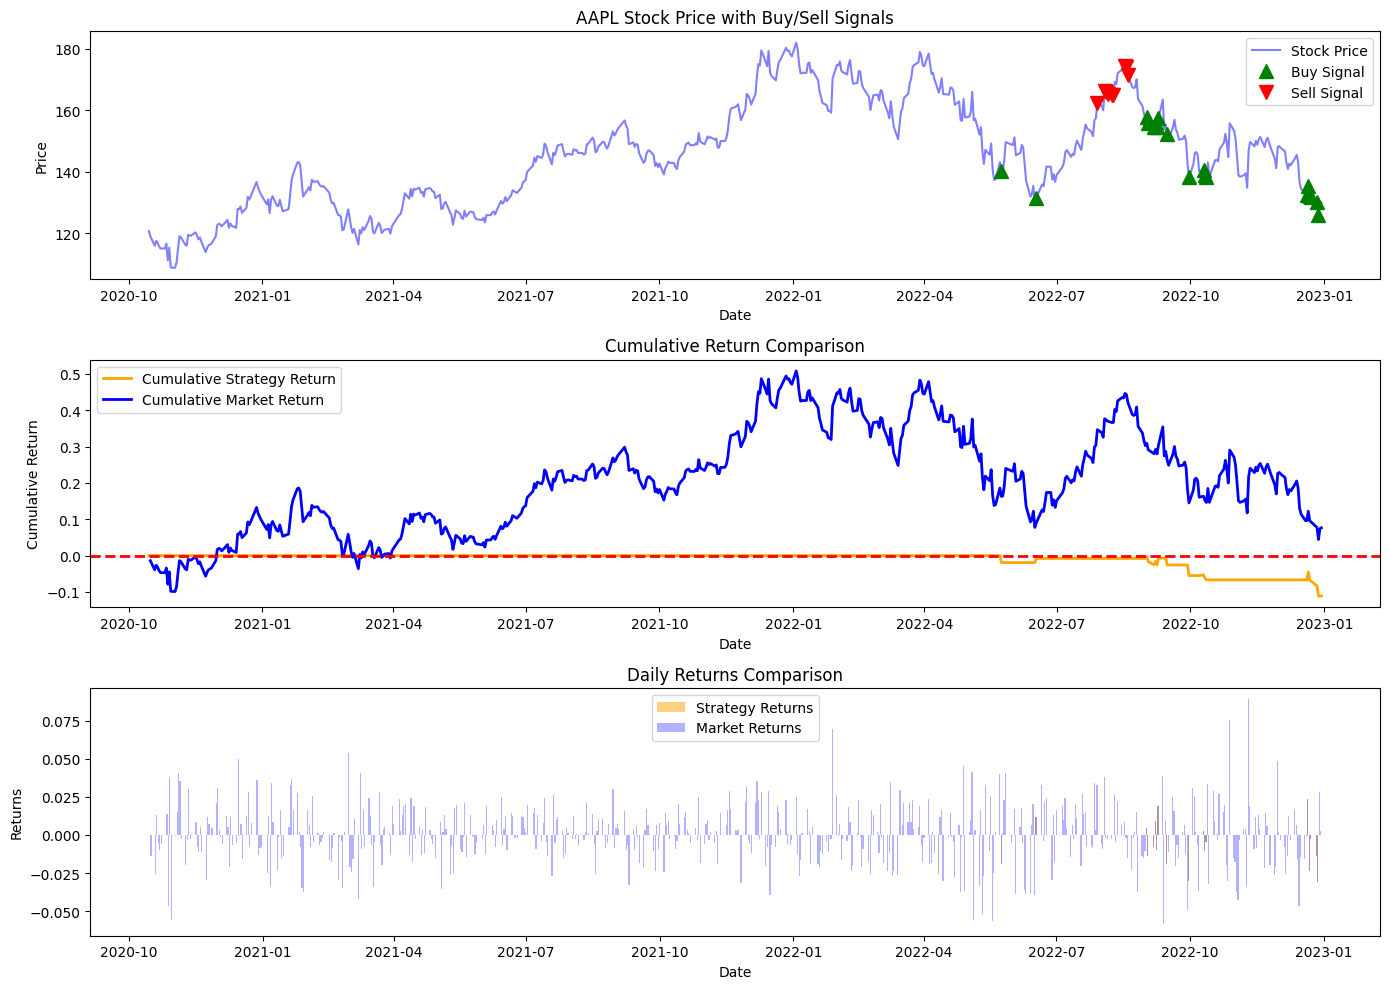

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Function to fetch data and calculate indicators
def fetch_and_prepare_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['RSI'] = calculate_rsi(data['Close'], 14)
    data['BB_upper'], data['BB_lower'] = calculate_bollinger_bands(data['Close'])
    data.dropna(inplace=True)
    return data

# RSI Calculation
def calculate_rsi(series, period):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Bollinger Bands Calculation
def calculate_bollinger_bands(series, window=20):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band

# Function to train the model and make predictions
def train_model(data):
    data.dropna(inplace=True)
    X = data[['SMA_50', 'SMA_200', 'RSI', 'BB_upper', 'BB_lower']]
    y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    data['Predicted_Signal'] = np.nan
    data.iloc[len(X_train):, data.columns.get_loc('Predicted_Signal')] = y_pred
    return data

# Function to backtest the strategy
def backtest_strategy(data):
    data['Buy_Signal'] = np.where((data['Predicted_Signal'] == 1) & (data['RSI'] < 30), data['Close'], np.nan)
    data['Sell_Signal'] = np.where((data['Predicted_Signal'] == 0) & (data['RSI'] > 70), data['Close'], np.nan)
    
    # Calculate strategy returns
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = np.where(data['Buy_Signal'].notna(), data['Market_Returns'], 0)
    data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Returns']).cumprod() - 1
    data['Cumulative_Market_Return'] = (1 + data['Market_Returns']).cumprod() - 1

    return data

# Function to plot results
def plot_strategy(data, ticker):
    plt.figure(figsize=(14, 10))

    # Stock price and buy/sell signals
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Stock Price', color='blue', alpha=0.5)
    plt.plot(data['Buy_Signal'], marker='^', color='green', markersize=10, label='Buy Signal', linestyle='None')
    plt.plot(data['Sell_Signal'], marker='v', color='red', markersize=10, label='Sell Signal', linestyle='None')
    plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Cumulative strategy returns vs. market returns
    plt.subplot(3, 1, 2)
    plt.plot(data['Cumulative_Strategy_Return'], label='Cumulative Strategy Return', color='orange', linewidth=2)
    plt.plot(data['Cumulative_Market_Return'], label='Cumulative Market Return', color='blue', linewidth=2)
    plt.axhline(0, color='red', linestyle='--', lw=2)  # Horizontal line at 0
    plt.title('Cumulative Return Comparison')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()

    # Additional performance metrics
    plt.subplot(3, 1, 3)
    plt.bar(data.index, data['Strategy_Returns'], label='Strategy Returns', color='orange', alpha=0.5)
    plt.bar(data.index, data['Market_Returns'], label='Market Returns', color='blue', alpha=0.3)
    plt.title('Daily Returns Comparison')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example Usage
ticker = 'AAPL'  # Example stock ticker
data = fetch_and_prepare_data(ticker)
data = train_model(data)
data = backtest_strategy(data)
plot_strategy(data, ticker)


[*********************100%%**********************]  1 of 1 completed


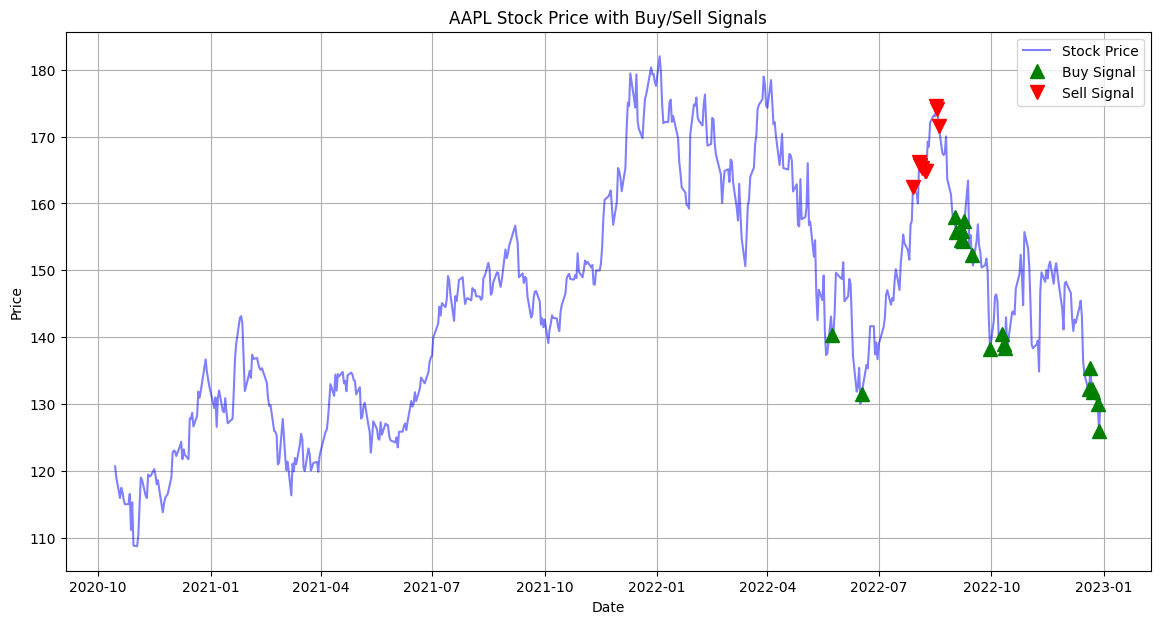

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Function to fetch data and calculate indicators
def fetch_and_prepare_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['RSI'] = calculate_rsi(data['Close'], 14)
    data['BB_upper'], data['BB_lower'] = calculate_bollinger_bands(data['Close'])
    data.dropna(inplace=True)
    return data

# RSI Calculation
def calculate_rsi(series, period):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Bollinger Bands Calculation
def calculate_bollinger_bands(series, window=20):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band

# Function to train the model and make predictions
def train_model(data):
    data.dropna(inplace=True)
    X = data[['SMA_50', 'SMA_200', 'RSI', 'BB_upper', 'BB_lower']]
    y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    data['Predicted_Signal'] = np.nan
    data.iloc[len(X_train):, data.columns.get_loc('Predicted_Signal')] = y_pred
    return data

# Function to backtest the strategy
def backtest_strategy(data):
    data['Buy_Signal'] = np.where((data['Predicted_Signal'] == 1) & (data['RSI'] < 30), data['Close'], np.nan)
    data['Sell_Signal'] = np.where((data['Predicted_Signal'] == 0) & (data['RSI'] > 70), data['Close'], np.nan)
    
    # Calculate strategy returns
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = np.where(data['Buy_Signal'].notna(), data['Market_Returns'], 0)
    data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Returns']).cumprod() - 1
    data['Cumulative_Market_Return'] = (1 + data['Market_Returns']).cumprod() - 1

    return data

# Function to plot buy and sell signals
def plot_buy_sell(data, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Stock Price', color='blue', alpha=0.5)
    plt.plot(data['Buy_Signal'], marker='^', color='green', markersize=10, label='Buy Signal', linestyle='None')
    plt.plot(data['Sell_Signal'], marker='v', color='red', markersize=10, label='Sell Signal', linestyle='None')
    plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
ticker = 'AAPL'  # Example stock ticker
data = fetch_and_prepare_data(ticker)
data = train_model(data)
data = backtest_strategy(data)
plot_buy_sell(data, ticker)
